In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Preprocessing Dataset

In [2]:
cols = [
    "area", "perimeter", "compactness", "length",
    "width", "asymmetry", "groove", "class",
]
df = pd.read_csv("data/seeds_dataset.txt", sep="\s+", names=cols)
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## PCA and K-means Clustering

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
X = df[df.columns[:-1]].values
y = df["class"].values.reshape(-1, 1)

## Finding Two important components with PCA

In [5]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [6]:
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=100)
kmeans.fit(transformed_x)

KMeans(n_clusters=3, n_init='auto', random_state=100)

## K-means Clustering

In [7]:
clusters = pd.Series(kmeans.labels_).map({0: 2, 1: 3, 2: 1})
clusters = clusters.to_numpy().reshape(-1, 1)

In [8]:
kmeans_pca_df = pd.DataFrame(
    np.hstack((transformed_x, clusters)),
    columns=["pca1", "pca2", "class"]
)
kmeans_pca_df["class"] = kmeans_pca_df["class"].astype("int8")


truth_pca_df = pd.DataFrame(
    np.hstack((transformed_x, y)),
    columns=["pca1", "pca2", "class"]
)
truth_pca_df["class"] = truth_pca_df["class"].astype("int8")

## Visualizing the result

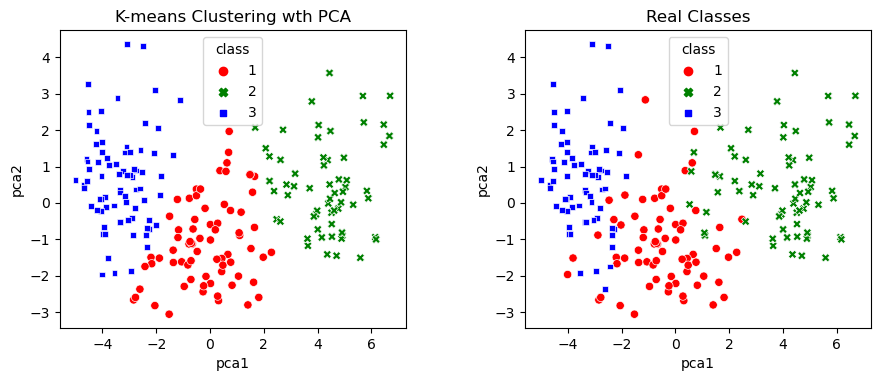

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.scatterplot(
    data=kmeans_pca_df,
    x="pca1", y="pca2",
    hue="class",
    style="class",
    palette=["red", "green", "blue"],
)
ax.set_title("K-means Clustering wth PCA")

plt.subplot(1, 2, 2)
ax = sns.scatterplot(
    data=truth_pca_df,
    x="pca1", y="pca2",
    hue="class",
    style="class",
    palette=["red", "green", "blue"],
)
ax.set_title("Real Classes")
plt.tight_layout(pad=5)
plt.show()

## Evaluation (using the classification metrics)


Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.86      0.85        70
           2       0.98      0.86      0.92        70
           3       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



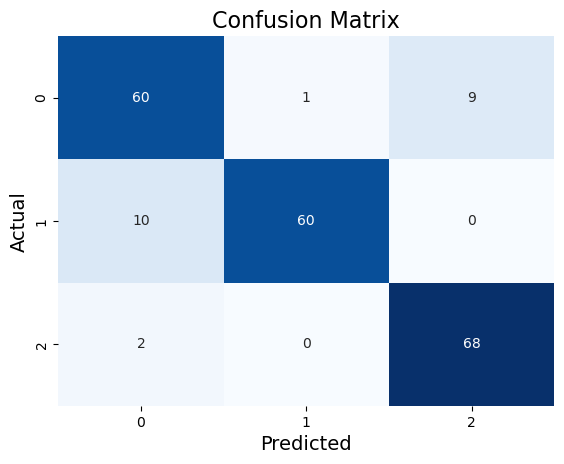

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y, clusters)
report = classification_report(y, clusters)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);